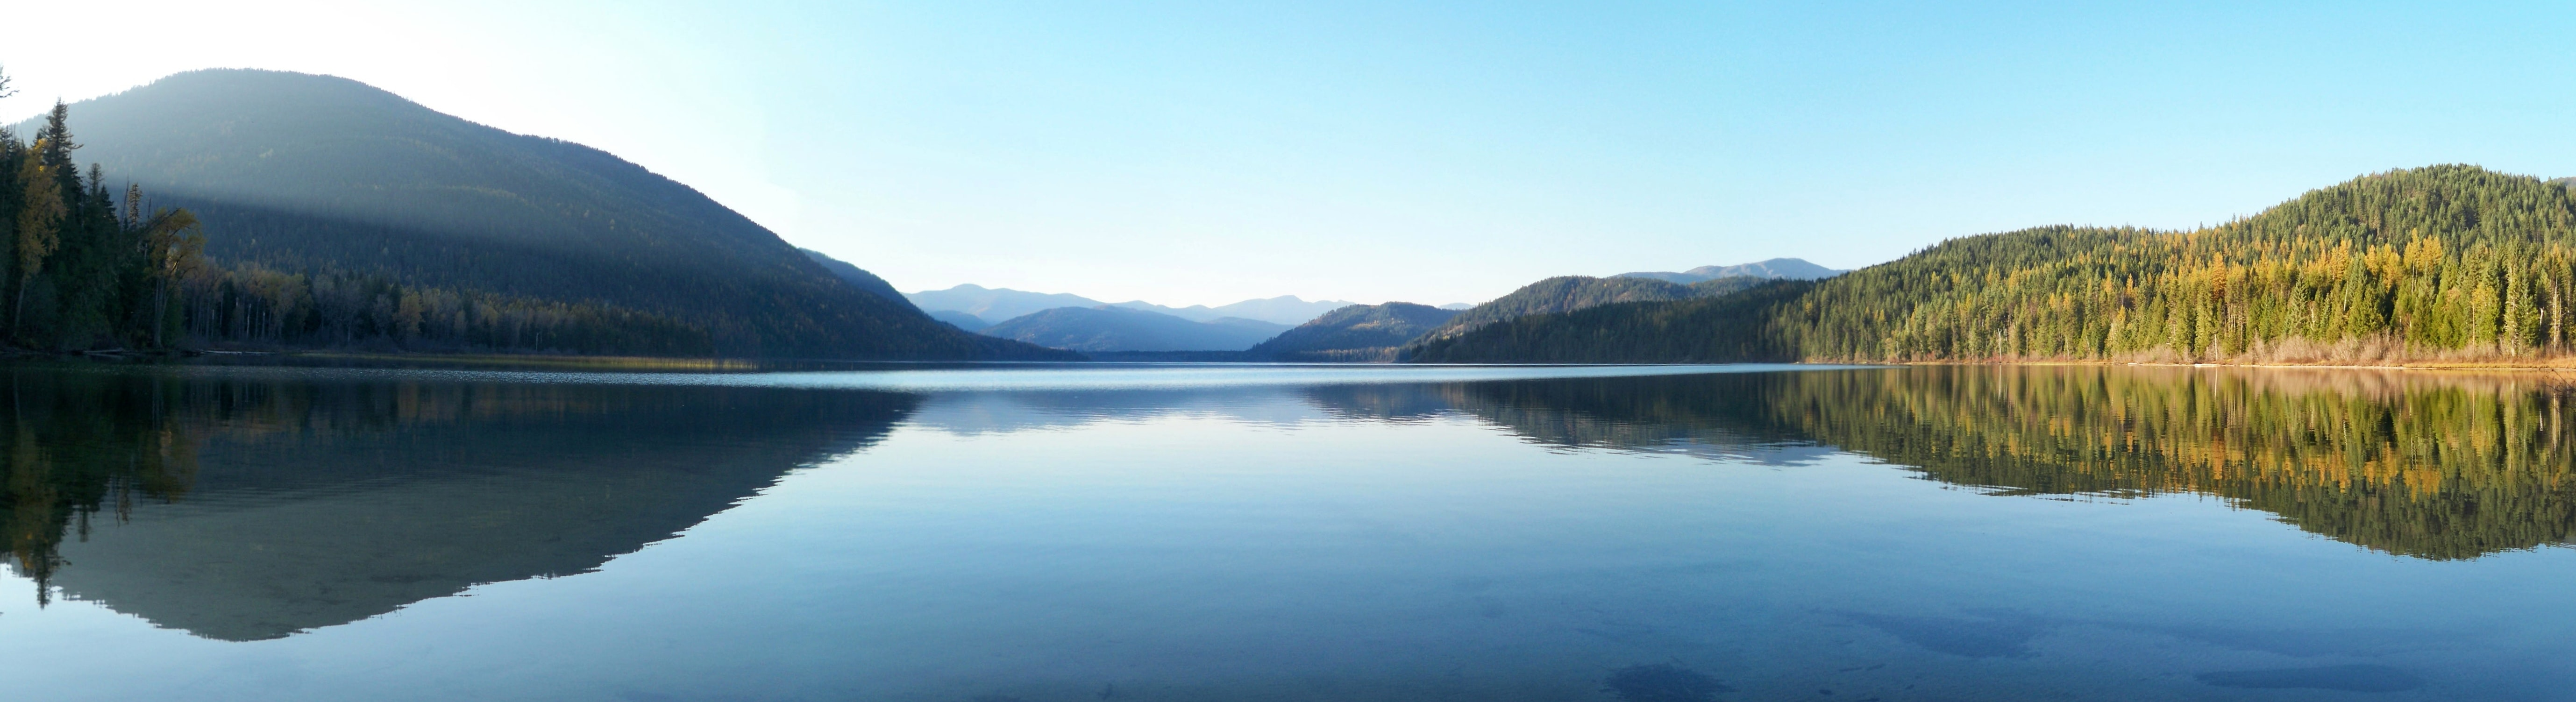

#  Scraping

### Import library 

In [1]:
import bs4
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup

# 

### Scraping Data from website 

In [2]:
html = urlopen('https://www.worldometers.info/world-population/')
bsobj = soup(html.read())
tbody = bsobj('table',{'class':'table table-striped table-bordered table-hover table-condensed table-list'})[0].findAll('tr')
xl = []
for row in tbody:
    cols = row.findChildren(recursive = False)
    cols = tuple(element.text.strip().replace('%','') for element in cols)
    xl.append(cols)
xl = xl[1:]
xl

[('2020', '7,794,798,739', '1.05 ', '81,330,639', '30.9', '2.47', '52'),
 ('2019', '7,713,468,100', '1.08 ', '82,377,060', '29.8', '2.51', '52'),
 ('2018', '7,631,091,040', '1.10 ', '83,232,115', '29.8', '2.51', '51'),
 ('2017', '7,547,858,925', '1.12 ', '83,836,876', '29.8', '2.51', '51'),
 ('2016', '7,464,022,049', '1.14 ', '84,224,910', '29.8', '2.51', '50'),
 ('2015', '7,379,797,139', '1.19 ', '84,594,707', '30', '2.52', '50'),
 ('2010', '6,956,823,603', '1.24 ', '82,983,315', '28', '2.58', '47'),
 ('2005', '6,541,907,027', '1.26 ', '79,682,641', '27', '2.65', '44'),
 ('2000', '6,143,493,823', '1.35 ', '79,856,169', '26', '2.78', '41'),
 ('1995', '5,744,212,979', '1.52 ', '83,396,384', '25', '3.01', '39'),
 ('1990', '5,327,231,061', '1.81 ', '91,261,864', '24', '3.44', '36'),
 ('1985', '4,870,921,740', '1.79 ', '82,583,645', '23', '3.59', '33'),
 ('1980', '4,458,003,514', '1.79 ', '75,704,582', '23', '3.86', '30'),
 ('1975', '4,079,480,606', '1.97 ', '75,808,712', '22', '4.47', '27

# 

### Connecting to SQL

In [3]:
import mysql.connector

In [4]:
scrap_db=mysql.connector.connect(
host="localhost",
user="Ajesh 1st",
passwd="Ajesh1161",
database="ajesh 1st"
)

### 

### Creating Table 

In [5]:
 cursor=scrap_db.cursor()

cursor.execute("DROP TABLE IF EXISTS population ")
# Create table as per requirement
sql = """CREATE TABLE population (
 Year INT,
 Population INT,
 Yearly_percentage INT,
 Yearly_Change INT,
 Median_Age INT,
 Fertility_Rate INT,
 Density INT
 )"""
cursor.execute(sql)

# 

### Inserting Data into a Database 

In [6]:
mySql_insert_query = """INSERT INTO population (Year, Population, Yearly_percentage, Yearly_Change,Median_Age,Fertility_Rate,Density) 
VALUES (%s, %s, %s, %s ,%s, %s, %s) """

records_to_insert = xl

#cursor = scrap_db.cursor()

cursor.executemany(mySql_insert_query, records_to_insert)
scrap_db.commit()
print(cursor.rowcount, "Record inserted successfully into Population table")
# disconnect from server

18 Record inserted successfully into Population table
